# Enter `Facebook prophet` 🔮

[prophet](https://facebook.github.io/prophet/docs/quick_start.html) is a **Python library** developed by Facebook for time series predictions. Reminder, that **time series** is the field of data analytics and data science that deals with *sequentially recorded data* (such as monthly sales, daily temperature, daily stock prices...)

# Setup ⚙️

Before working on the code, let's **install `prophet` in this notebook**.

The installation will **take a few minutes** so feel free to start the installation first, so you're ready to go when the exercises start 🚀

ℹ️ Following the image below, click on the "Environment" tab (box icon) and in the "Explore" tab search for `prophet` - install the first package on the list and then click on the "Restart Kernel" button when it appears on the bottom right.

<img src="https://wagon-public-datasets.s3.amazonaws.com/sprints/prophet-setup.png" />


Setup is done, you're ready to predict with Python!

**Quick reminder about Jupyter notebooks** 

* Type inside the empty cells to write code. These empty cells will have a `In [ ]:` prefix before
* Press the `return/enter ⏎` key to add a new line inside the cell
* To display your results use the Python built in `print(STUFF_YOU_WANT_TO_PRINT)` method or simply put the stuff you want to print as the last line inside the cell. The result of the **last line** will appear as the `Out[]:` or the output of the cell :)
* Press `shift` + `return/enter ⏎` to run your code 🤓 this will run the code inside your currently selected cell and print anything inside `print()` method and the last line of your cell
* To add a new cell, select any cell and press the `b` key (make sure you are not just typing the letter `b` in the cell). This will add a new cell below
* To delete a cell, double press the `d` key (make sure you are not just typing the letter `d` in the cell)

**Try to run the cells below!**

In [1]:
1 + 1

2

In [2]:
print("Are you ready to do your first prediction?")
"Ready!" # last line of each cell is automatically displayed as Output, no need for print()

Are you ready to do your first prediction?


'Ready!'

## Our first prediction - sales forecasting 🚗

In [3]:
from prophet import Prophet
import pandas as pd

And importing our data. For this exercise, we will look at how Python and `fbprophet` can be used for **sales forecasting** - an important task in any business that wants to plan ahead.

Let's look at monthly sales of a *unnamed* car company 😉

In [4]:
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/sprints/prophet-monthly-car-sales.csv')
df.tail()

,Month,Sales
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180
107,1968-12,14577


### Understanding our data

Whenever we start with a new dataset, our first goal is to **explore** what's in it! 🔍

**Your turn! 🚀** Check how many rows and columns we have in the dataset.

In [5]:
# your code here
df.shape

(108, 2)

<details><summary>Solution</summary>
    
<pre>
df.shape
</pre>
    
</details>

**Your turn! 🚀** Let's see what are the **data types** of our columns

In [6]:
# your code here
# df.index
# df.columns
df.dtypes

Month object
Sales int64
dtype: object

<details><summary>Solution</summary>
    
<pre>
df.dtypes
</pre>
    
</details>

**Your turn! 🚀** Plot a **linechart** of the monthly sales using `df.plot()` function

<Axes: xlabel='Month'>

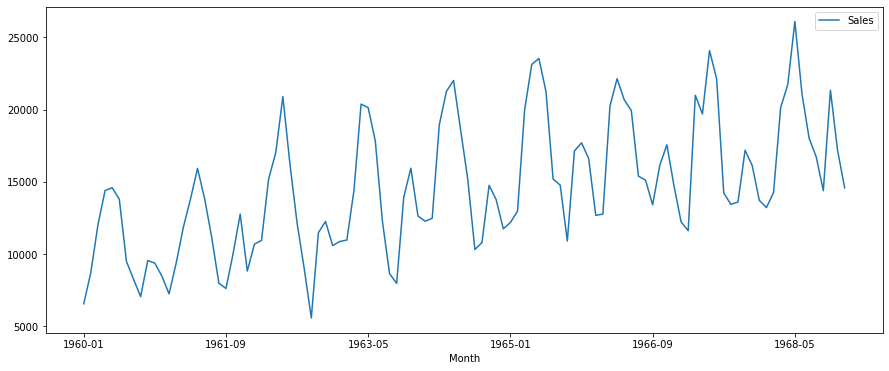

In [7]:
# your code here
# df.plot.line(x='Month', y='Sales')
df.plot(x='Month', y='Sales', figsize=(15,6))

<details><summary>Solution</summary>
    
<pre>
df.plot(x='Month', y='Sales', figsize=(15,6)) # we change to figsize to make it bigger
</pre>
    
</details>

We can already start seeing some patterns, but let's see how we can use machines to make predictions for us!

### Preparing our data for Prophet

If we check the official [Prophet docs](https://facebook.github.io/prophet/docs/quick_start.html) we will see that there's a few conditions it asks of us:

1. Prophet needs the **datetime** column to be called `ds`
2. Prophet needs the **observations** column to be called `y`

First of all let's rename our columns correctly. That's as easy as just assigning a new list of columns, like this:

```python
df.columns = ['column1', 'column2']
```

In [8]:
# your code here
df.columns = ['ds', 'y']
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


<details><summary>Solution</summary>
    
<pre>
df.columns = ['ds', 'y']
</pre>
    
</details>

You might have noticed that our `Month` column (now called `ds`) doesn't have the right data type - it's current type is `object`. That's because `pandas` by default only sees text (which it calls `object`) and numbers.

We can use the built-in [pandas.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function to quickly change that! Notice that by itself, `pd.to_datetime()` function creates a *copy* of the column, so we need to save it back to the original columns, like so:

In [29]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds datetime64[ns]
y int64
dtype: object

In [34]:
# dt = datetime
# df['ds'].dt.year
# df['ds'].dt.month
# df['ds'].dt.day

Normally, we would also have to change our DataFrame to match the structure we saw in the slides like this one:

<img src="https://wagon-public-datasets.s3.amazonaws.com/sprints/prophet-timeseriesdata.png" width=350/>

**But** the amazing `prophet` does that for us! Which means we are ready to start **Machine Learning** 🤖

### Creating the Prophet prediction model

All Machine Learning tasks consist of the same steps:

1. Creating the model
2. Training the model (that's what takes the most time)
3. Using the model to predict
4. Evaluating the performance of the model

So, what are we waiting for?

**1. Creating the model**

At the top of this notebook we imported the `Prophet` *class*. This class is the "factory" which can help us create Prophet models. This is how it looks like:

In [13]:
model = Prophet()

**2. Training the model**

We have a `model` ready, but it is not trained yet. That's our next step - we will give it our `df` DataFrame to *fit* an algorithm, which the machine will observe fits best all the historic observations we have.

> don't worry about the <span style='color: red;'>red text with `INFO`</span> that gets printed - it's just info logs to show you that the package is running

In [14]:
model.fit(df)

22:00:30 - cmdstanpy - INFO - Chain [1] start processing
22:00:30 - cmdstanpy - INFO - Chain [1] done processing


**Boom 💥** our `model` has found a "logic" that best explains the historic sales data. Now the caveat of Machine Learning in general is that often that "logic" is a **black box** ◼️ The model finds a formula that works for it, but as people we don't have much visibility into it.

But we can leverage it for **predictions!** 🔮

### Forecasting and predictions

When we talk about doing predictions programmatically, we talk about two types of predictions:

1. **In-sample** - we remove part of our historic data, and predict it with the model, to see how well it does
2. **Out-of-sample** (future predictions) - after verifying that our model "makes sense", we use it to generate future predictions

**In-sample** - Let's take the last 12 months of our existing dataset, and see how close are our model's predictions to the real sales

We can slice our DataFrame not only by columns (ex. `df['column']`) but also by rows, like this:

In [15]:
df[100:102]

,ds,y
100,1968-05-01,26099
101,1968-06-01,21084


**Your turn! 🚀** So how do we get the **last 12 months** of the our DataFrame? 🤔


In [43]:
# your code here
# sample = df[96:108]
sample = df[-12:]
sample

,ds,y
96,1968-01-01,13210
97,1968-02-01,14251
98,1968-03-01,20139
99,1968-04-01,21725
100,1968-05-01,26099
101,1968-06-01,21084
102,1968-07-01,18024
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342


<details><summary>Solution</summary>
    
<pre>
sample = df[96:108]
sample
</pre>
    
</details>

We are now ready to create a **forecast** - a DataFrame with predictions from our Prophet model.

*P.S.* we want the result to be a DataFrame with one column - `ds` - not just one list of dates. So we select the needed column below with double-brackets, like `[['ds]]`

In [38]:
forecast = model.predict(sample[['ds']])
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1968-01-01,17820.140687,12800.053216,15909.165713,17820.140687,17820.140687,-3462.551456,-3462.551456,-3462.551456,-3462.551456,-3462.551456,-3462.551456,0.0,0.0,0.0,14357.589231
1,1968-02-01,17875.817853,13333.977557,16451.205767,17875.817853,17875.817853,-2951.624176,-2951.624176,-2951.624176,-2951.624176,-2951.624176,-2951.624176,0.0,0.0,0.0,14924.193677
2,1968-03-01,17927.902944,19309.888343,22461.121093,17927.902944,17927.902944,2946.680899,2946.680899,2946.680899,2946.680899,2946.680899,2946.680899,0.0,0.0,0.0,20874.583843
3,1968-04-01,17983.580110,21323.609009,24367.940090,17983.580110,17983.580110,4915.186080,4915.186080,4915.186080,4915.186080,4915.186080,4915.186080,0.0,0.0,0.0,22898.766190
4,1968-05-01,18037.461239,22662.500249,25726.680496,18037.461239,18037.461239,6158.798635,6158.798635,6158.798635,6158.798635,6158.798635,6158.798635,0.0,0.0,0.0,24196.259875


Wow that's a lot of stuff 🤯 We will explore what is what in a minute, but first let's first **visualize** our predictions, which would be much more human.

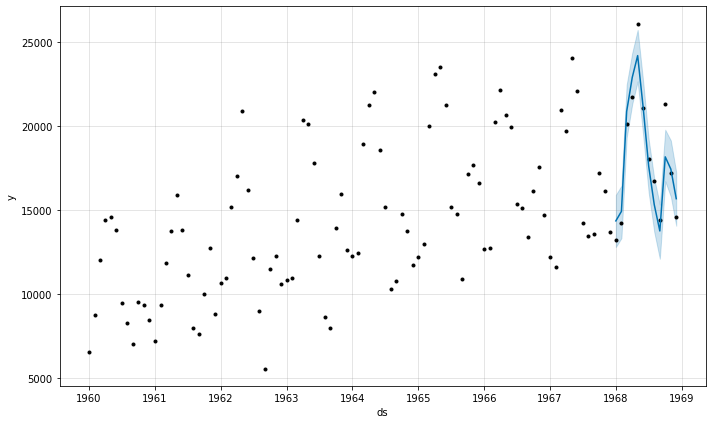

In [41]:
model.plot(forecast);

The black dots in the chart above is the real data points. 

The <span style='color: darkblue;'>dark blue line</span> is the predicted value - it's a line chart between the `yhat` points that we saw in the `forecast` DataFrame above.

The <span style='color: lightblue;'>light blue area</span> is the **confidence interval** - typically a 95% confidence window of the model prediction.

**[Bonus 🥇]** We can also add a **line chart** for the historic data to make it more visual:

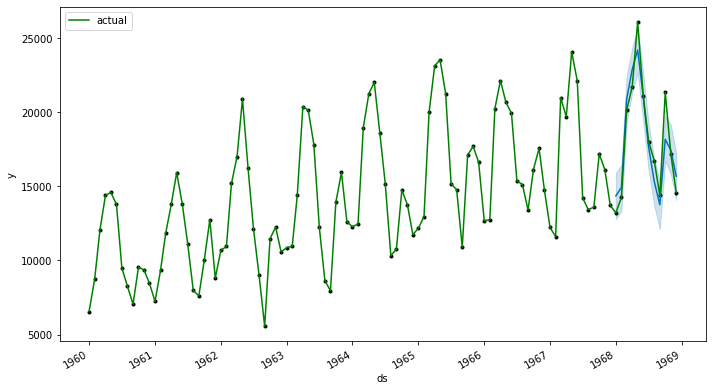

In [44]:
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g');

**[Bonus Bonus 💥]** Looks like our model is fitting quite well! But **how well?** 🤔

We have the real data (`y` column) from our `sample`, and we have the predicted `yhat` from `forecast`.  Let's see the differences!

In [45]:
difference = abs(forecast['yhat'].values - sample['y'].values) # abs gives us the absolute number
difference

array([1147.58923119, 673.19367684, 735.58384279, 1173.76619013,
 1902.74012549, 23.64072877, 397.98565707, 1395.42005947,
 626.61488665, 3171.9054308 , 260.50926769, 1101.86246126])

From the above result we can see the **errors** - the difference between the predicted and actual car sales for the last 12 months.

Considering our car sales those months are between 15,000 ~ 25,000 cars, getting errors <1000 cars for most months is pretty good (for 20 minutes of work)! 🥳

Remember that this was the **in-sample** prediction. Now let's move on to **future forecasting! 🕵️‍♂️**

### Future Forecasting - out-of-sample (new data) predictions

Luckily `prophet` comes with some amazing tools for predictions, including the [`make_future_dataframe()`](https://facebook.github.io/prophet/docs/non-daily_data.html) method which allows us to quickly create a set of future dates to use for prediction. And it automatically turns it into a `DataFrame` 🙌

In [47]:
future = model.make_future_dataframe(freq='MS', periods=24)
future

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
...,...
127,1970-08-01
128,1970-09-01
129,1970-10-01
130,1970-11-01


You'll see that what it does is **append** the new months to the existing data - very useful, since we want to connect the two for an uninterrupted chart.

🚀 The prediction code is the same as before, only now we will be using the `future` DataFrame, not the `sample` any more.

In [49]:
# Your code here
future_forecast = model.predict(future)

<details><summary>Solution</summary>
    
<pre>
future_forecast = model.predict(future)
</pre>
    
</details>

🚀 Let's go ahead and plot it same way as we did before with the `model`.

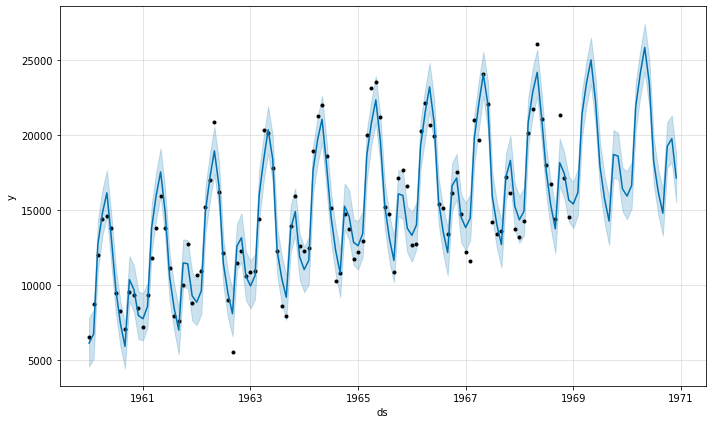

In [51]:
# Your code here
model.plot(future_forecast);

<details><summary>Solution</summary>
    
<pre>
model.plot(future_forecast);
</pre>
    
</details>

### Congrats! 👏 This is your first prediction on unseen data!

You can also see how the model looks for patterns in historic data, but without **overfitting** - you can see that some black dots are not covered by the blue area. Which is normal, because not every month of car sales follows the same pattern, we've all had better and worse months 😉

**Let's explore our results further**

### Seasonality and Trend

To understand our results better, we need to explore the **components** that influence our car sales. The main two are seasonality and trend:

- **Seasonality** is the waves in our data. Looking at those can help find patterns of highs and lows.
- **Trend** is the general direction of the data. This helps us see whether we're increasing or decreasing over time.

And again `prophet` has helpful functions ready to use - let's use the [`plot_components()`](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html) function on our `model`.

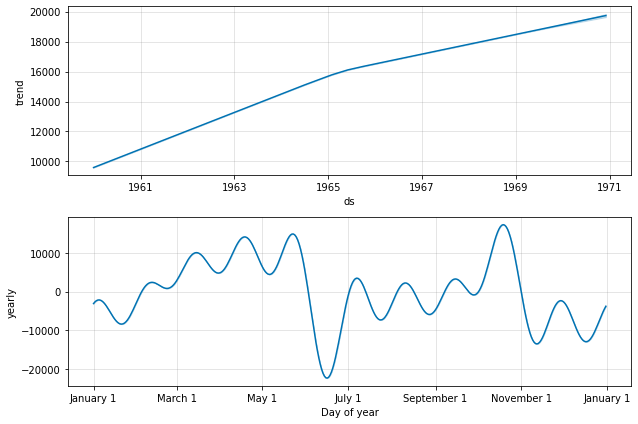

In [52]:
model.plot_components(future_forecast);

**[Bonus 🥇]** We can make our plots interactive with another Python library called [Plotly](https://plotly.com/python/):

In [53]:
from prophet.plot import plot_plotly

plot_plotly(model, future_forecast)

### Model Evaluation

We can't jump to conclusions on our model and trust it blindly. Even though we good a low error (difference) when looking at existing data, we need to look at some other important **metrics** to confidently say that our model can help the company! 🏎️

<img src='cv.png' width=500/>

`prophet` comes with a handy [Diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html) library built in.

Let's start by doing [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) - a technique in statistics, to run through the same process multiple times (instead of just one like we did above), and see how consistent are our results. Run the below two cells:

In [54]:
from prophet.diagnostics import cross_validation

In [55]:
df_cv = cross_validation(model, period='180 days', horizon='365 days')

22:46:42 - cmdstanpy - INFO - Chain [1] start processing
22:46:42 - cmdstanpy - INFO - Chain [1] done processing
22:46:42 - cmdstanpy - INFO - Chain [1] start processing
22:46:42 - cmdstanpy - INFO - Chain [1] done processing
22:46:42 - cmdstanpy - INFO - Chain [1] start processing
22:46:43 - cmdstanpy - INFO - Chain [1] done processing
22:46:43 - cmdstanpy - INFO - Chain [1] start processing
22:46:43 - cmdstanpy - INFO - Chain [1] done processing
22:46:43 - cmdstanpy - INFO - Chain [1] start processing
22:46:43 - cmdstanpy - INFO - Chain [1] done processing
22:46:44 - cmdstanpy - INFO - Chain [1] start processing
22:46:44 - cmdstanpy - INFO - Chain [1] done processing
22:46:44 - cmdstanpy - INFO - Chain [1] start processing
22:46:44 - cmdstanpy - INFO - Chain [1] done processing
22:46:45 - cmdstanpy - INFO - Chain [1] start processing
22:46:45 - cmdstanpy - INFO - Chain [1] done processing
22:46:45 - cmdstanpy - INFO - Chain [1] start processing
22:46:45 - cmdstanpy - INFO - Chain [1]

As we saw, this took longer than a regular model training and prediction. That's because it ran the process **10 times**, each time taking a piece of the data as the "seen" data, and predicting the next period, as though it is "unseen", trying to predict up to one year ahead each time. Robots are tricky, eh? 🤖

In [58]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1963-07-01,13805.834994,12622.505081,14893.264961,12268,1963-06-26
1,1963-08-01,10199.552854,9109.712104,11278.927878,8642,1963-06-26
2,1963-09-01,6936.309554,5853.535968,8085.003986,7962,1963-06-26
3,1963-10-01,13997.753644,12847.929312,15016.444849,13932,1963-06-26
4,1963-11-01,15570.436281,14454.045776,16678.232200,15936,1963-06-26
...,...,...,...,...,...,...
115,1968-08-01,14785.206461,13214.543018,16427.565631,16722,1967-12-02
116,1968-09-01,13521.404315,12068.622063,15029.519981,14385,1967-12-02
117,1968-10-01,17058.064660,15474.772398,18593.974368,21342,1967-12-02
118,1968-11-01,17418.704369,15864.706348,18949.676591,17180,1967-12-02


If you look inside the `df_cv` variable, you'll see that we're storing a bunch of data about the real car sales throughout the years (`y` column), the predicted sales (`yhat`) as well as the `cutoff`s - the time blocks used to simulate "unseen" data, so we can better understand our model performance.

You might notice already not everything is as rosy as it seemed 🥀 

But we did **all this in 1 hour**! Imagine what **you can do with more time!!! 🤩**

### Wrapping up - interpretation

To close our current exploration and prediction, let's visualize the `mae` - [**Mean Absolute Error**](https://en.wikipedia.org/wiki/Mean_absolute_erro). This is the average difference that we're getting between the real car sales and predicted ones.

Remember, when we looked at *in-sample* prediction, our average MAE was around 1000 cars. Let's see how much harder *real* predictions get 🙈

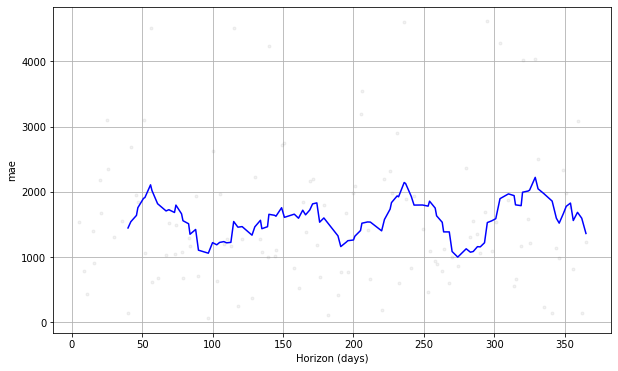

In [59]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

### Explaining these results to your boss 💹

Let's explore the chart above:
* Our horizontal (`x`) axis is how many days into the future we're predicting. As you can see, we tried to predict up to a maximum of 365 days (1 year). That's our **horizon**
* Our vertical (`y`) axis is the **Mean Absolute Error** - the average error in our predictions in car sales. We can see we are typically making errors of around 1000-2000 cars.

**Our best case interpretation:**

We can see some clear highs and lows in our errors, which is not good. :( The main reason for that is that our data is `monthly` but we are doing our cross-validation `by day`. 

Still, it seems that **our predictions are best at `around 3 to 6 months into the future`, where we are able to `predict with 95% confidence the car sales, with an error of ±1300 cars`.**

Before and after that the **volatility** (waviness) or errors becomes too big to say anything with certainty. Your boss will be happy you did your research 🤓

# Congrats on completing this challenge! 🙌 There's always more to learn!